In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np

BS = 32
image_size = 0
width = 256
height = 256

classifier1 = load_model('/content/drive/MyDrive/PDDCNN_PLD_With_Data_Augmentation/PDDCNN_PLD_with_Augmentation.h5')

validation_datagen = ImageDataGenerator(rescale = 1./255)
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/PLD-80-20-256/Validation',
                                                                target_size = (height, width),
                                                                batch_size = BS,
                                                                class_mode = 'categorical',
                                                                shuffle=False)

#Confution Matrix and Classification Report
Y_pred = classifier1.predict(validation_generator, verbose = True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Early Blight', 'Healthy', 'Late Blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 405 images belonging to 3 classes.
13/13 [==============================] - 11s 849ms/step
Confusion Matrix
[[162   1   0]
 [  0 101   0]
 [  0   0 141]]
Classification Report
              precision    recall  f1-score   support

Early Blight       1.00      0.99      1.00       163
     Healthy       0.99      1.00      1.00       101
 Late Blight       1.00      1.00      1.00       141

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



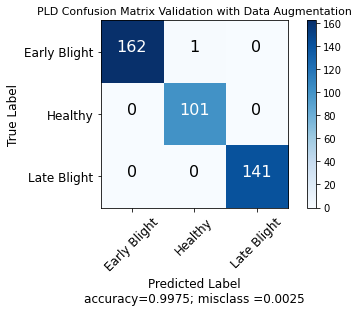

In [ ]:
def plot_confusion_matrix(cm,target_names, title='Confusion Matrix', cmap = None, normalize = True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    accuracy = np.trace(cm)/float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize = (6,4))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, size = 11)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45, size=12)
        plt.yticks(tick_marks, target_names, size = 12)
        
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i,j]), fontsize = 16,
                     horizontalalignment = "center", 
                     color = "white" if cm[i,j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i,j]), 
                     horizontalalignment = "center", fontsize = 16, 
                     color = "white" if cm[i,j] > thresh else "black")
                    
    
    plt.tight_layout()
    plt.ylabel('True Label', size = 12)
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass ={:0.4f}'.format(accuracy,misclass),size=12)
    plt.show()
    


cm = confusion_matrix(validation_generator.classes, y_pred)    
plot_confusion_matrix(cm, normalize = False, 
                     target_names = target_names,
                     title = "PLD Confusion Matrix Validation with Data Augmentation")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np

BS = 32
image_size = 0
width = 256
height = 256

classifier1 = load_model('/content/drive/MyDrive/PDDCNN_PLD_With_Data_Augmentation/PDDCNN_PLD_with_Augmentation.h5')

Test_datagen = ImageDataGenerator(rescale = 1./255)
# Create a generator for prediction
Test_generator = Test_datagen.flow_from_directory('/content/drive/MyDrive/PLD-80-20-256/Testing',
                                                                target_size = (height, width),
                                                                batch_size = BS,
                                                                class_mode = 'categorical',
                                                                shuffle=False)

#Confution Matrix and Classification Report
Y_pred = classifier1.predict(Test_generator, verbose = True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Early Blight', 'Healthy', 'Late Blight']
print(classification_report(Test_generator.classes, y_pred, target_names=target_names))

Found 407 images belonging to 3 classes.
13/13 [==============================] - 11s 855ms/step
Confusion Matrix
[[162   1   0]
 [  0 102   0]
 [  0   0 142]]
Classification Report
              precision    recall  f1-score   support

Early Blight       1.00      0.99      1.00       163
     Healthy       0.99      1.00      1.00       102
 Late Blight       1.00      1.00      1.00       142

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407



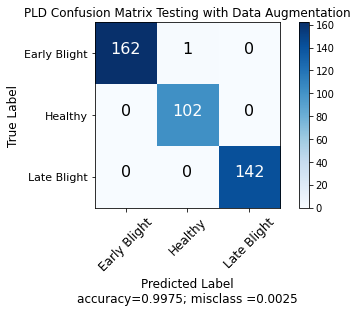

In [ ]:
def plot_confusion_matrix(cm,target_names, title='Confusion Matrix', cmap = None, normalize = True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    accuracy = np.trace(cm)/float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize = (6,4))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, size = 12)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45, size=12)
        plt.yticks(tick_marks, target_names, size = 11)
        
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i,j]), fontsize = 16,
                     horizontalalignment = "center", 
                     color = "white" if cm[i,j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i,j]), 
                     horizontalalignment = "center", fontsize = 16, 
                     color = "white" if cm[i,j] > thresh else "black")
                    
    
    plt.tight_layout()
    plt.ylabel('True Label', size = 12)
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass ={:0.4f}'.format(accuracy,misclass),size=12)
    plt.show()
                    
    



cm = confusion_matrix(Test_generator.classes, y_pred)    
plot_confusion_matrix(cm, normalize = False, 
                     target_names = target_names,
                     title = "PLD Confusion Matrix Testing with Data Augmentation")